# Import and Clean Data

In [79]:
#Import libraries and data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

gb = pd.read_csv('online_gaming_behavior_dataset.csv')

In [80]:
gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [81]:
#Examine the value counts for the categorical features

categoricals = gb.select_dtypes("object")

for col in categoricals: 
    print(gb[col].value_counts(), "\n")

Male      23959
Female    16075
Name: Gender, dtype: int64 

USA       16000
Europe    12004
Asia       8095
Other      3935
Name: Location, dtype: int64 

Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: GameGenre, dtype: int64 

Easy      20015
Medium    12011
Hard       8008
Name: GameDifficulty, dtype: int64 

Medium    19374
High      10336
Low       10324
Name: EngagementLevel, dtype: int64 



In [82]:
gb = gb[(gb['EngagementLevel']=='High')|(gb['EngagementLevel']=='Low')]

In [83]:
gb

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
5,9005,37,Male,Europe,RPG,20.561855,0,Easy,2,81,74,22,Low
6,9006,25,Male,USA,Action,9.752716,0,Hard,1,50,13,2,Low
9,9009,38,Female,Other,Sports,23.942772,0,Easy,13,95,99,36,High
10,9010,17,Male,USA,Strategy,4.829916,0,Hard,8,95,14,12,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40026,49026,33,Male,Other,Sports,19.825140,1,Easy,12,166,44,11,High
40027,49027,17,Male,Europe,Simulation,1.273467,0,Easy,6,24,52,17,Low
40028,49028,36,Male,USA,RPG,1.020489,0,Hard,4,34,97,21,Low
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High


In [84]:
gb = pd.get_dummies(gb, dtype = float)
gb

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Gender_Male,...,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium,EngagementLevel_High,EngagementLevel_Low
2,9002,22,8.223755,0,16,142,35,41,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,9005,37,20.561855,0,2,81,74,22,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,9006,25,9.752716,0,1,50,13,2,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,9009,38,23.942772,0,13,95,99,36,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
10,9010,17,4.829916,0,8,95,14,12,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40026,49026,33,19.825140,1,12,166,44,11,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
40027,49027,17,1.273467,0,6,24,52,17,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
40028,49028,36,1.020489,0,4,34,97,21,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
40030,49030,44,13.539280,0,19,114,71,27,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [85]:
gb = gb.drop(['PlayerID', 'PlayTimeHours', 'Gender_Male', 'Location_USA', 'GameGenre_Strategy', 'GameDifficulty_Easy', 'EngagementLevel_Low'], axis=1)
gb

,Age,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Location_Asia,Location_Europe,Location_Other,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameDifficulty_Hard,GameDifficulty_Medium,EngagementLevel_High
2,22,0,16,142,35,41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,37,0,2,81,74,22,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,25,0,1,50,13,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,38,0,13,95,99,36,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10,17,0,8,95,14,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40026,33,1,12,166,44,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
40027,17,0,6,24,52,17,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40028,36,0,4,34,97,21,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
40030,44,0,19,114,71,27,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


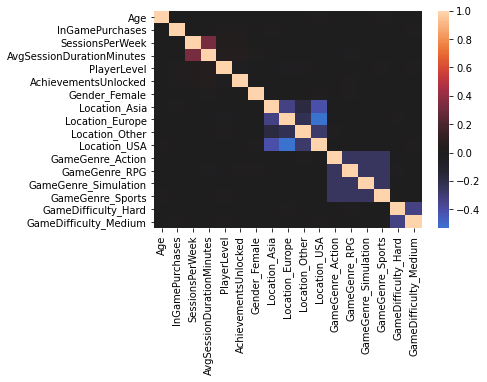

In [86]:
import seaborn as sns
sns.heatmap(X.corr(), center=0);

# Used `statsmodels` to build a logistic regression model and interpret

source: [github](https://github.com/learn-co-curriculum/dsc-linear-to-logistic-regression/blob/master/index.ipynb)

In [87]:
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [88]:
X = gb.drop(['EngagementLevel_High'], axis=1)
y = gb['EngagementLevel_High']

In [89]:
import statsmodels.api as sm

# Create intercept term required for sm.Logit, see documentation for more information
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

# Get results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.226555
         Iterations 8


In [90]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     EngagementLevel_High   No. Observations:                20660
Model:                            Logit   Df Residuals:                    20643
Method:                             MLE   Df Model:                           16
Date:                  Tue, 06 Aug 2024   Pseudo R-squ.:                  0.6732
Time:                          15:50:29   Log-Likelihood:                -4680.6
converged:                         True   LL-Null:                       -14320.
Covariance Type:              nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -7.5016      0.164    -45.617      0.000      -7.824      -7.179
Age                          -0.0006      0.003     -0.202      0.840      -0.006       0.005
InGamePurchases               0.0920      0.068      1.346      0.178      -0.042       0.226
SessionsPerWeek               0.3588      0.005     72.165      0.000       0.349       0.369
AvgSessionDurationMinutes     0.0335      0.001     58.003      0.000       0.032       0.035
PlayerLevel                   0.0070      0.001      7.194      0.000       0.005       0.009
AchievementsUnlocked          0.0126      0.002      6.523      0.000       0.009       0.016
Gender_Female                 0.0330      0.056      0.586      0.558      -0.077       0.143
Location_Asia                 0.0166      0.075      0.220      0.826      -0.131       0.165
Location_Europe              -0.0953      0.067     -1.431      0.153      -0.226       0.035
Location_Other               -0.0282      0.098     -0.288      0.773      -0.220       0.163
GameGenre_Action              0.0433      0.087      0.498      0.619      -0.127       0.214
GameGenre_RPG                 0.0404      0.088      0.460      0.646      -0.132       0.212
GameGenre_Simulation          0.1034      0.087      1.186      0.236      -0.067       0.274
GameGenre_Sports             -0.0320      0.087     -0.369      0.712      -0.202       0.138
GameDifficulty_Hard           0.0874      0.073      1.205      0.228      -0.055       0.230
GameDifficulty_Medium         0.0294      0.064      0.460      0.646      -0.096       0.154
=============================================================================================
"""

In [91]:
np.exp(result.params)

const                        0.000552
Age                          0.999446
InGamePurchases              1.096382
SessionsPerWeek              1.431678
AvgSessionDurationMinutes    1.034048
PlayerLevel                  1.007014
AchievementsUnlocked         1.012681
Gender_Female                1.033549
Location_Asia                1.016763
Location_Europe              0.909128
Location_Other               0.972229
GameGenre_Action             1.044269
GameGenre_RPG                1.041177
GameGenre_Simulation         1.108951
GameGenre_Sports             0.968541
GameDifficulty_Hard          1.091346
GameDifficulty_Medium        1.029794
dtype: float64

# Logistic Regression with Scikit Learn and Proper train-test split and Preprocessing

source: [github](https://github.com/learn-co-curriculum/dsc-logistic-regression-in-scikit-learn/blob/master/index.ipynb)

In [92]:
X = gb.drop(['EngagementLevel_High'], axis=1)
y = gb['EngagementLevel_High']

In [93]:
#Train-Test Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

Here I normalized the data by putting all of the features on a consistent scale of 0 to 1 which is appropriate because I'm dealing with a binary classification model.  MinMaxScaler [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    # index is important to ensure we can concatenate with other columns
    index=X_train.index,
    columns=X_train.columns
)
X_train_scaled

,Age,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Location_Asia,Location_Europe,Location_Other,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameDifficulty_Hard,GameDifficulty_Medium
24191,0.352941,0.0,0.105263,0.763314,0.071429,0.510204,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
18148,0.382353,0.0,0.263158,0.236686,0.867347,0.183673,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26286,0.058824,0.0,0.052632,0.810651,0.316327,0.857143,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
471,0.176471,0.0,0.842105,0.479290,0.193878,0.632653,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
22661,0.705882,1.0,0.157895,0.029586,0.010204,0.346939,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25457,0.970588,1.0,0.368421,0.159763,0.051020,0.408163,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
38080,0.411765,1.0,0.684211,0.017751,0.377551,0.183673,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19077,0.529412,0.0,0.526316,0.775148,0.714286,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20936,0.529412,0.0,0.842105,0.988166,0.826531,0.693878,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [95]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_scaled, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In the cell below, 0 means the prediction and the actual value matched, whereas 1 means the prediction and the actual value did not match. 

88% correct on our training data

In [96]:
y_hat_train = logreg.predict(X_train_scaled)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0.0    13630
1.0     1865
Name: Residuals (counts), dtype: int64

0.0    0.879639
1.0    0.120361
Name: Residuals (proportions), dtype: float64


In [97]:
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    index=X_test.index,
    columns=X_test.columns
)

X_test_scaled

,Age,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Location_Asia,Location_Europe,Location_Other,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameDifficulty_Hard,GameDifficulty_Medium
2607,0.647059,0.0,0.631579,0.692308,0.540816,0.367347,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39897,0.058824,0.0,0.105263,0.467456,0.204082,0.857143,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19920,0.823529,0.0,0.157895,0.011834,0.653061,0.163265,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
21275,0.176471,0.0,0.894737,0.781065,0.755102,0.408163,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
27851,0.764706,0.0,0.263158,0.011834,0.061224,0.489796,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,0.147059,0.0,0.578947,1.000000,0.285714,0.877551,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32960,0.147059,0.0,0.315789,0.076923,0.459184,0.408163,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4168,0.352941,0.0,0.473684,0.976331,0.418367,0.204082,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25285,0.029412,0.0,0.578947,0.887574,0.255102,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
y_hat_test = logreg.predict(X_test_scaled)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0.0    4522
1.0     643
Name: Residuals (counts), dtype: int64

0.0    0.875508
1.0    0.124492
Name: Residuals (proportions), dtype: float64


# Confusion Matrix

source: [github](https://github.com/learn-co-curriculum/dsc-visualizing-confusion-matrices-lab/blob/solution/index.ipynb)

In [99]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

{'TP': 2383, 'TN': 2139, 'FP': 418, 'FN': 225}

In [100]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[2139  418]
 [ 225 2383]]


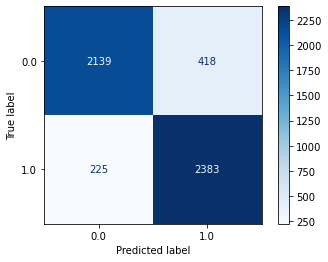

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize your confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)

# Metric Comparison from Logistic Regression Model

source: [github](https://github.com/learn-co-curriculum/dsc-evaluating-logistic-regression-models-lab/blob/solution/index.ipynb)

In [102]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.8534056660638939
Testing Precision:  0.8507675830060693



Training Recall:  0.9160196687370601
Testing Recall:  0.9137269938650306



Training Accuracy:  0.8796385930945466
Testing Accuracy:  0.8755082284607938



Training F1-Score:  0.8836048180740186
Testing F1-Score:  0.8811240525050842


In [110]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89       621
         1.0       0.87      0.91      0.89       618

    accuracy                           0.89      1239
   macro avg       0.89      0.89      0.89      1239
weighted avg       0.89      0.89      0.89      1239



In [103]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0)
    logreg = LogisticRegression(fit_intercept=False, C=1e25, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

    training_precision.append(precision_score(y_train, y_hat_train))
    testing_precision.append(precision_score(y_test, y_hat_test))
    training_recall.append(recall_score(y_train, y_hat_train))
    testing_recall.append(recall_score(y_test, y_hat_test))
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    training_f1.append(f1_score(y_train, y_hat_train))
    testing_f1.append(f1_score(y_test, y_hat_test))

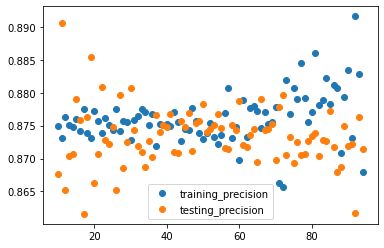

In [104]:
# Train and test precision
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

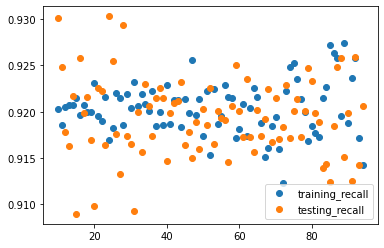

In [105]:
# Train and test recall
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

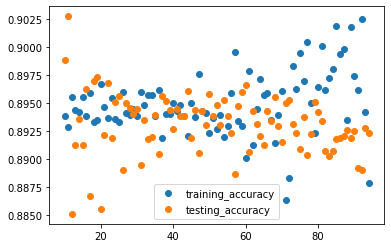

In [106]:
# Train and test accuracy
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()

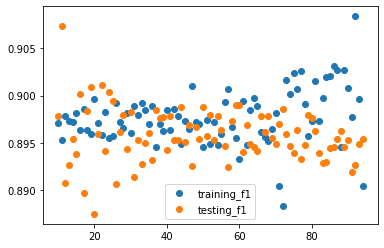

In [107]:
# Train and test F1 score
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()

# Area Under the Curve and ROC  Graph

source: [github](https://github.com/learn-co-curriculum/dsc-roc-curves-and-auc/blob/master/index.ipynb)

Train AUC: 0.9438399282918771
Test AUC: 0.9419465471700278


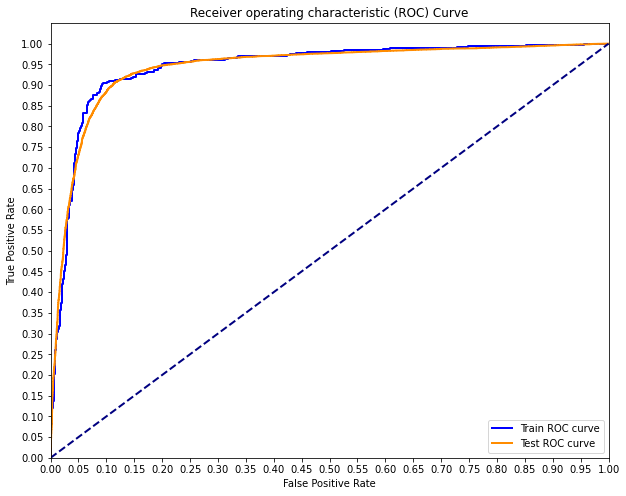

In [108]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(metrics.auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(metrics.auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()